This chapter discusses how the following training algorithms behave under the hood: 
- Linear Regression
- Polynomial Regression
- Logistic Regression
- Softmax Regression.

# 1 - Linear Regression

*Equation 1: Linear Regression model prediction*

\begin{equation*}
\hat{y} = \theta_0 + \theta_1x_1 + \theta_2x_2\;+\;...\;+\;\theta_nx_n
\end{equation*}

$
\bullet \;\hat{y}\small{\text{ is the predicted value.}}\\
\bullet n\small{\text{ is the number of features.}}\\
\bullet x_i\small{\text{ is the }i^{th}\text{ feature value.}}\\
$

*Equation 2: Linear Regression model prediction (vectorized form)*

\begin{equation*}
\hat{y} = h_\boldsymbol{\theta}(\mathbf{x}) = \boldsymbol{\theta}\cdot\mathbf{x}
\end{equation*}

$
\bullet \;\boldsymbol{\theta}\small{
    \text{ is the model's parameter vector, containing the bias term }
    \theta_0
    \text{ and the feature weights }
    \theta_1
    \text{ to }
    \theta_n
}.\\
\bullet \;\mathbf{x}\small{
    \text{ is the instance's feature vector, containing }
    x_0
    \text{ to }
    x_n
    \text{, with }
    x_0
    \text{ always equal to 1}
}.\\
\bullet \;\boldsymbol{\theta}\cdot\mathbf{x}\small{
    \text{ is the dot product of the vectors }
    \boldsymbol{\theta}
    \text{ and }
    \mathbf{x}
    \text{, which is equal to }
    \theta_0 + \theta_1x_1 + \theta_2x_2\;+\;...\;+\;\theta_nx_n
}.\\
\bullet \;h_\boldsymbol{\theta}\small{
    \text{ is the hypothesis function, using the model parameters }
    \boldsymbol{\theta}
}.\\
$

*Equation 3: Mean Square Error (MSE) cost function for a Linear Regression model*

\begin{equation*}
\text{MSE}(\mathbf{X}, h_\boldsymbol{\theta}) = \frac{1}{m}\sum_{i=1}^m (\boldsymbol{\theta}^\mathrm{T}\mathbf{x}^{(i)}-y^{(i)})^2
\end{equation*}

Training Linear Regression models involves finding a parameter vector that minimizes the Root Mean Square Error (RMSE).

The Normal Equation is a closed-form solution to this problem.

*Equation 4: Normal Equation*

\begin{equation*}
\hat{\boldsymbol{\theta}} = (\mathbf{X}^{\mathrm{T}}\mathbf{X})^{-1}\mathbf{X}^{\mathrm{T}}\mathbf{y}
\end{equation*}

$
\bullet \;\hat{\boldsymbol{\theta}}\small{
    \text{ is the value of }
    \boldsymbol{\theta}
    \text{ that minimizes the cost function }
}.\\
\bullet \;\mathbf{y}\small{
    \text{ is the vector of target values containing }
    y^{(1)}
    \text{ to }
    y^{(m)}
}.\\
$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

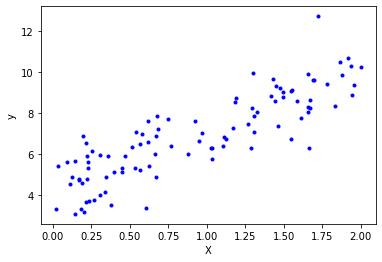

In [2]:
# Linear-ish random data to demonstrate the Normal Equation
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.plot(X, y, 'b.')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [3]:
# Add x0 = 1 to each instance of X
X_b = np.c_[np.ones((100, 1)), X]

# Apply the Normal Equation
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.2343548 ],
       [2.86876433]])

A perfect solution would be $\theta_0 = 4$ and $\theta_1 = 3$, since the random data was generated using $y = 4 + 3x_1 +$ some Gaussian noise.

In [4]:
# Use the parameter vector to predict y values for x1 = 0 and x1 = 2
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.2343548 ],
       [9.97188346]])

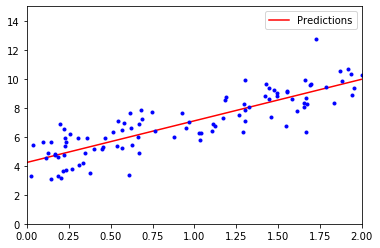

In [5]:
plt.plot(X_new, y_predict, 'r-', label='Predictions')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.legend()
plt.show()

In [6]:
# Using Scikit-Learn's LinearRegression class
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.2343548]), array([[2.86876433]]))

In [7]:
lin_reg.predict(X_new)

array([[4.2343548 ],
       [9.97188346]])

In [8]:
# LinearRegression is based on scipy's least squares function scipy.linalg.lstsq()
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.2343548 ],
       [2.86876433]])

scipy.linalg.lstsq() computes $\hat{\boldsymbol{\theta}} = \mathbf{X}^+\mathbf{y}$, where $\mathbf{X}^+$ is the pseudoinverse of $\mathbf{X}$.

In [9]:
# Calculate using the pseudoinverse
np.linalg.pinv(X_b).dot(y)

array([[4.2343548 ],
       [2.86876433]])

Using the pseudoinverse is both more efficient and more general than the Normal Equation.

## Gradient Descent

Gradient Descent is an algorithm that iteratively tweaks parameters in order to minimize a cost function (such as the MSE cost function in the case of Linear Regression). The amount the parameter changes is proportional to the slope so the steps get smaller as the parameters approach the minimum.

**Batch Gradient Descent** uses the entire training set to compute the gradients at each step.

*Equation 5: Partial derivatives of the MSE cost function*

\begin{equation*}
\frac{\partial}{\partial \theta_j}\text{MSE}(\boldsymbol{\theta}) = 
\frac{2}{m}\sum^m_{i=1}(\boldsymbol{\theta}^\mathrm{T}\mathbf{x}^{(i)}-y^{(i)})x^{(i)}_j
\end{equation*}

*Equation 6: Gradient vector of the cost function*

\begin{equation*}
\nabla_{\boldsymbol{\theta}}\text{MSE}(\boldsymbol{\theta})=
\begin{pmatrix}
\frac{\partial}{\partial\theta_0}\text{MSE}(\boldsymbol{\theta})\\
\frac{\partial}{\partial\theta_1}\text{MSE}(\boldsymbol{\theta})\\
\vdots\\
\frac{\partial}{\partial\theta_n}\text{MSE}(\boldsymbol{\theta})\\
\end{pmatrix}=
\frac{2}{m}\mathbf{X}^\mathrm{T}(\mathbf{X}\boldsymbol{\theta}-\mathbf{y})
\end{equation*}

*Equation 7: Gradient Descent step*

\begin{equation*}
\boldsymbol{\theta}^\text{(next step)}=\boldsymbol{\theta}-\eta\nabla_\boldsymbol{\theta}\text{MSE}(\boldsymbol{\theta})
\end{equation*}

$\eta$ represents the learning rate hyperparameter, which determines the size of each step.

In [10]:
# Hyperparameters
eta = 0.1
n_iterations = 1000
m = 100

# Some random initialization
theta = np.random.randn(2, 1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [11]:
theta

array([[4.2343548 ],
       [2.86876433]])

This is the same result as from the Normal Equation. If $\eta$ was set to a smaller value, it would take much longer to converge; if it was larger, it would likely overshoot and diverge.

**Stochastic Gradient Descent** uses a random instance in the training set for each step to compute the gradients. This is faster and scales better than Batch Gradient Descent, but will take more iterations to determine less optimal final parameters.

The random nature of this algorithm makes it less likely to get caught in local optima, but since it can't converge like Batch Gradient descent the learning rate must be handled differently.

One example is a learning schedule, which reduces the learning rate over the number of iterations.

In [15]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

In [16]:
theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [17]:
theta

array([[4.20540025],
       [2.84334429]])

In [18]:
from sklearn.linear_model import SGDRegressor

# This will continue for 1000 epochs or until the loss drops by less than 0.001 (tolerance)
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [20]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21996728]), array([2.84857009]))

**Mini-batch Gradient Descent** provides a compromise between Stochastic and Batch Gradient Descent algorithms, in that it iterates over small batches of random instances for each step. It is both faster than Batch and less erratic than Stochastic.

In [24]:
n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)

t0, t1 = 200, 1000

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients

In [25]:
theta

array([[4.23679646],
       [2.88034298]])